In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import os.path

from os import getcwd
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import savemat, loadmat
import math
from scipy.fftpack import fft, ifft
from scipy.stats import zscore, f_oneway
#import samplerate
import multiprocessing as mp
from scipy.signal import resample
import random
import pyreadr
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score
import scipy
import matplotlib.patches as mpatches
import mne
from mne.preprocessing import ICA
from mne.time_frequency import tfr_morlet
from sklearn.metrics import r2_score


In [2]:
def nansem(a, axis=1):
    return np.nanstd(a, axis=0)/np.sqrt(a.shape[axis])

In [3]:
all_cue_ecog = loadmat("processed_data/all_cue_ecog.mat")

ecog_hg_three_mean = all_cue_ecog['ecog_hg_three_mean']
ecog_hg_three_sem = all_cue_ecog['ecog_hg_three_sem']

ecog_hg_sus_mean = all_cue_ecog['ecog_hg_sus_mean']
ecog_hg_sus_sem = all_cue_ecog['ecog_hg_sus_sem']

ecog_hg_onset_mean = all_cue_ecog['ecog_hg_onset_mean']
ecog_hg_onset_sem = all_cue_ecog['ecog_hg_onset_sem']


In [4]:
all_cue_speech_unit_ecog = loadmat("all_cue_speech_unit_ecog.mat")

cue_mat_1_pos = all_cue_speech_unit_ecog['cue_mat_1_pos']
cue_mat_all_pos = all_cue_speech_unit_ecog['cue_mat_all_pos']
cue_mat_1_pos_sem = all_cue_speech_unit_ecog['cue_mat_1_pos_sem']
cue_mat_all_pos_sem = all_cue_speech_unit_ecog['cue_mat_all_pos_sem']
cue_mat_1_pos_speech = all_cue_speech_unit_ecog['cue_mat_1_pos_speech']
cue_mat_all_pos_speech = all_cue_speech_unit_ecog['cue_mat_all_pos_speech']
cue_mat_1_pos_speech_sem = all_cue_speech_unit_ecog['cue_mat_1_pos_speech_sem']
cue_mat_all_pos_speech_sem = all_cue_speech_unit_ecog['cue_mat_all_pos_speech_sem']

cue_mat_1_neg = all_cue_speech_unit_ecog['cue_mat_1_neg']
cue_mat_all_neg = all_cue_speech_unit_ecog['cue_mat_all_neg']
cue_mat_1_neg_sem = all_cue_speech_unit_ecog['cue_mat_1_neg_sem']
cue_mat_all_neg_sem = all_cue_speech_unit_ecog['cue_mat_all_neg_sem']
cue_mat_1_neg_speech = all_cue_speech_unit_ecog['cue_mat_1_neg_speech']
cue_mat_all_neg_speech = all_cue_speech_unit_ecog['cue_mat_all_neg_speech']
cue_mat_1_neg_speech_sem = all_cue_speech_unit_ecog['cue_mat_1_neg_speech_sem']
cue_mat_all_neg_speech_sem = all_cue_speech_unit_ecog['cue_mat_all_neg_speech_sem']

speech_mat_1_pos = all_cue_speech_unit_ecog['speech_mat_1_pos']
speech_mat_all_pos = all_cue_speech_unit_ecog['speech_mat_all_pos']
speech_mat_1_pos_sem = all_cue_speech_unit_ecog['speech_mat_1_pos_sem']
speech_mat_all_pos_sem = all_cue_speech_unit_ecog['speech_mat_all_pos_sem']
speech_mat_1_pos_speech = all_cue_speech_unit_ecog['speech_mat_1_pos_speech']
speech_mat_all_pos_speech = all_cue_speech_unit_ecog['speech_mat_all_pos_speech']
speech_mat_1_pos_speech_sem = all_cue_speech_unit_ecog['speech_mat_1_pos_speech_sem']
speech_mat_all_pos_speech_sem = all_cue_speech_unit_ecog['speech_mat_all_pos_speech_sem']

speech_mat_1_neg = all_cue_speech_unit_ecog['speech_mat_1_neg']
speech_mat_all_neg = all_cue_speech_unit_ecog['speech_mat_all_neg']
speech_mat_1_neg_sem = all_cue_speech_unit_ecog['speech_mat_1_neg_sem']
speech_mat_all_neg_sem = all_cue_speech_unit_ecog['speech_mat_all_neg_sem']
speech_mat_1_neg_speech = all_cue_speech_unit_ecog['speech_mat_1_neg_speech']
speech_mat_all_neg_speech = all_cue_speech_unit_ecog['speech_mat_all_neg_speech']
speech_mat_1_neg_speech_sem = all_cue_speech_unit_ecog['speech_mat_1_neg_speech_sem']
speech_mat_all_neg_speech_sem = all_cue_speech_unit_ecog['speech_mat_all_neg_speech_sem']

ecog_hg_onset_mean = all_cue_speech_unit_ecog['ecog_hg_onset_mean']
ecog_hg_onset_sem = all_cue_speech_unit_ecog['ecog_hg_onset_sem']


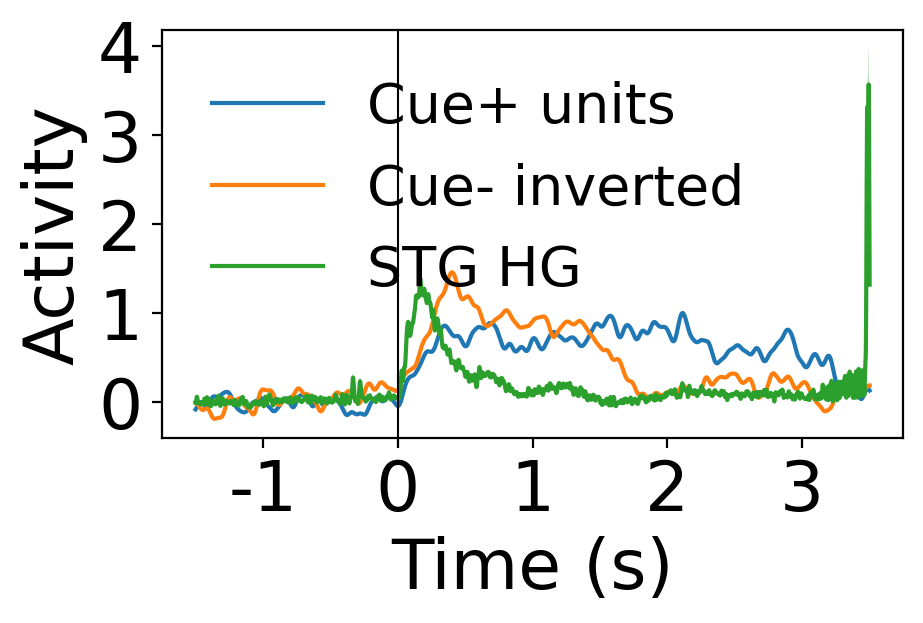

In [5]:
xvals = np.linspace(-1.5, 3.5, 5000)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)

adjestment = zscore(np.array(cue_mat_1_pos), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_mat_1_pos), axis=1)-adjestment

mean = mean.mean(axis=0)
sem = nansem(zscore(np.array(cue_mat_1_pos), axis=1))
axs.plot(xvals, mean, label='Cue+ units')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)



adjestment = zscore(np.array(cue_mat_1_neg), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_mat_1_neg), axis=1)*-1+adjestment

mean = mean.mean(axis=0)
sem = nansem(zscore(np.array(cue_mat_1_neg), axis=1))
axs.plot(xvals, mean, label='Cue- inverted')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

mean = ecog_hg_onset_mean.mean(axis=0)
sem = ecog_hg_onset_sem.mean(axis=0)
axs.plot(xvals, mean, label='STG HG')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

axs.axvline(0, color='k', linewidth=0.75)

axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=25)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=25)
axs.set_xlabel('Time (s)', fontsize=25)
axs.set_ylabel('Activity', fontsize=25)
axs.legend(frameon=0, fontsize=20)
plt.show();

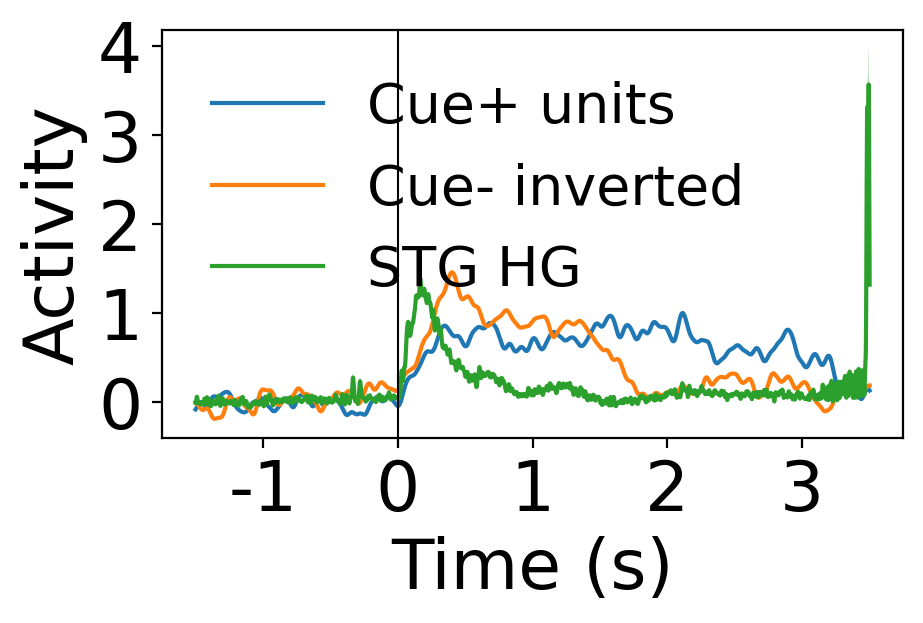

In [6]:
xvals = np.linspace(-1.5, 3.5, 5000)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)

adjestment = zscore(np.array(cue_mat_1_pos), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_mat_1_pos), axis=1)-adjestment

mean = mean.mean(axis=0)
sem = nansem(zscore(np.array(cue_mat_1_pos), axis=1))
axs.plot(xvals, mean, label='Cue+ units')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)



adjestment = zscore(np.array(cue_mat_1_neg), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_mat_1_neg), axis=1)*-1+adjestment

mean = mean.mean(axis=0)
sem = nansem(zscore(np.array(cue_mat_1_neg), axis=1))
axs.plot(xvals, mean, label='Cue- inverted')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

mean = ecog_hg_onset_mean.mean(axis=0)
sem = ecog_hg_onset_sem.mean(axis=0)
axs.plot(xvals, mean, label='STG HG')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

axs.axvline(0, color='k', linewidth=0.75)

axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=25)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=25)
axs.set_xlabel('Time (s)', fontsize=25)
axs.set_ylabel('Activity', fontsize=25)
axs.legend(frameon=0, fontsize=20)
plt.show();

In [9]:
cue_only_synamics = {'cue_only_pos':cue_only_mat_1[cue_only_pos], 
                     'cue_only_neg':cue_only_mat_1[cue_only_neg]}

NameError: name 'cue_only_mat_1' is not defined

In [8]:
cue_only_synamics = loadmat("processed_data/cue_only_synamics.mat")
cue_only_pos = cue_only_synamics['cue_only_pos']
cue_only_neg = cue_only_synamics['cue_only_neg']

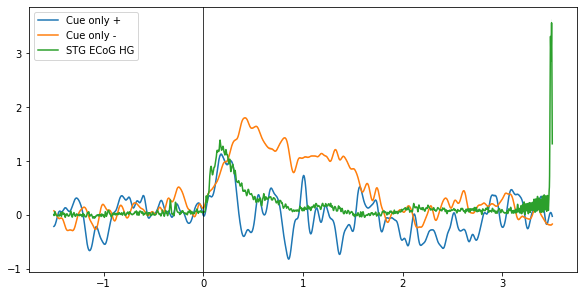

In [10]:
xvals = np.linspace(-1.5, 3.5, 5000)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))

adjestment = zscore(np.array(cue_only_pos), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_pos), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_only_pos), axis=1))
axs.plot(xvals, mean, label='Cue only +')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_only_neg), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_neg), axis=1).mean(axis=0)*-1+adjestment
sem = nansem(zscore(np.array(cue_only_neg), axis=1))
axs.plot(xvals, mean, label='Cue only -')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

mean = ecog_hg_onset_mean.mean(axis=0)
sem = nansem(ecog_hg_onset_mean, axis=1)
axs.plot(xvals, mean, label='STG ECoG HG')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

axs.axvline(0, color='k', linewidth=0.75)

plt.legend()
plt.show();

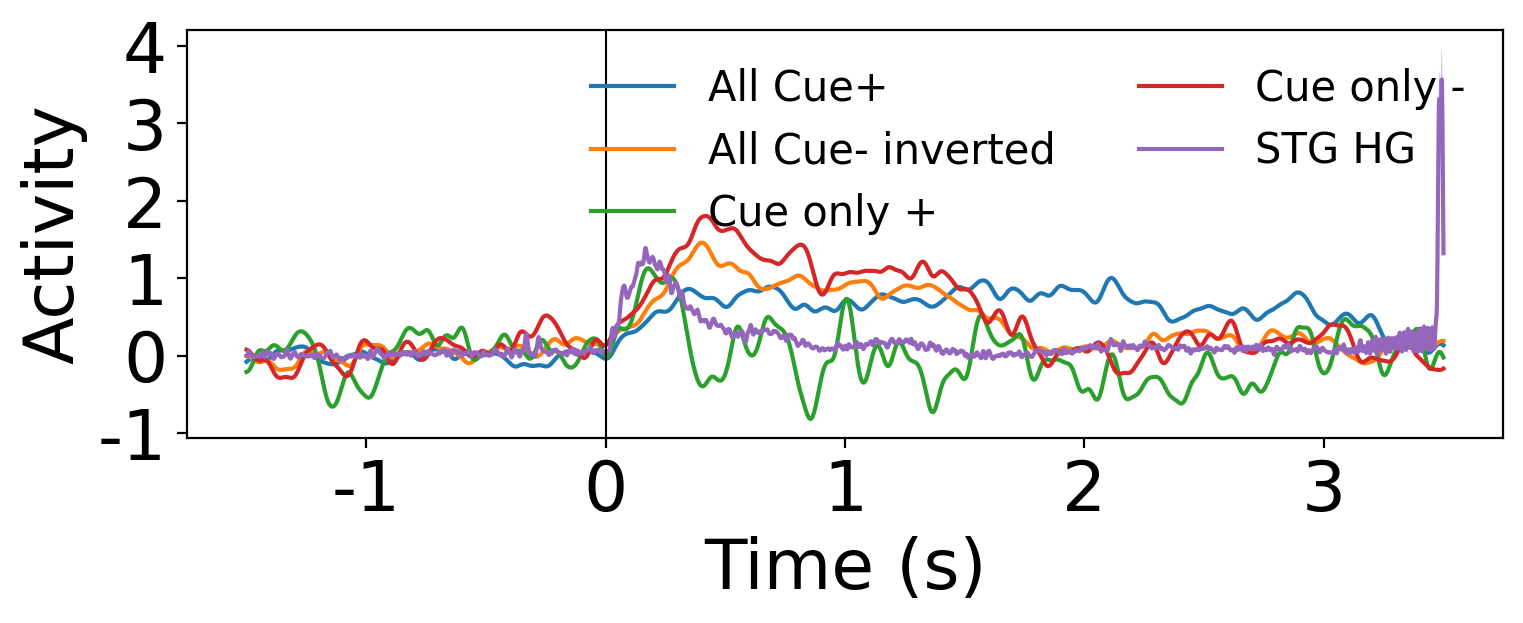

In [11]:
xvals = np.linspace(-1.5, 3.5, 5000)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(7.5, 3), dpi=200)
axs.patch.set_alpha(0)

adjestment = zscore(np.array(cue_mat_1_pos), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_mat_1_pos), axis=1)-adjestment
mean = mean.mean(axis=0)
sem = nansem(zscore(np.array(cue_mat_1_pos), axis=1))
axs.plot(xvals, mean, label='All Cue+')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_mat_1_neg), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_mat_1_neg), axis=1)*-1+adjestment
mean = mean.mean(axis=0)
sem = nansem(zscore(np.array(cue_mat_1_neg), axis=1))
axs.plot(xvals, mean, label='All Cue- inverted')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_only_pos), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_pos), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_only_pos), axis=1))
axs.plot(xvals, mean, label='Cue only +')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_only_neg), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_neg), axis=1).mean(axis=0)*-1+adjestment
sem = nansem(zscore(np.array(cue_only_neg), axis=1))
axs.plot(xvals, mean, label='Cue only -')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)


mean = ecog_hg_onset_mean.mean(axis=0)
sem = ecog_hg_onset_sem.mean(axis=0)
axs.plot(xvals, mean, label='STG HG')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

axs.axvline(0, color='k', linewidth=0.75)

axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=25)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=25)
axs.set_xlabel('Time (s)', fontsize=25)
axs.set_ylabel('Activity', fontsize=25)
axs.legend(frameon=0, fontsize=15, ncol=2, loc=1)
plt.show();

In [ ]:
speech_mat_1_pos

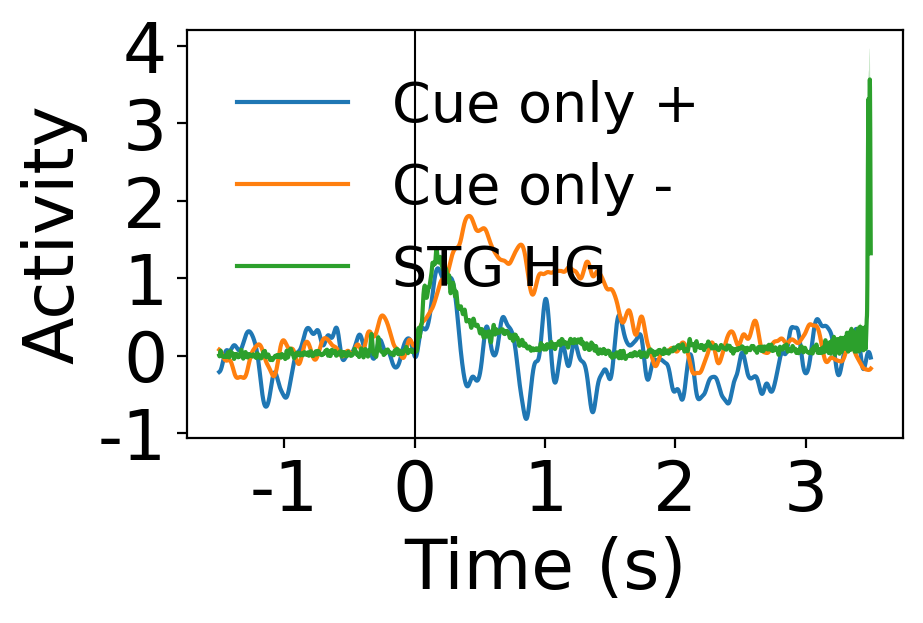

In [17]:
xvals = np.linspace(-1.5, 3.5, 5000)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)

adjestment = zscore(np.array(cue_only_pos), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_pos), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_only_pos), axis=1))
axs.plot(xvals, mean, label='Cue only +')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_only_neg), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_neg), axis=1).mean(axis=0)*-1+adjestment
sem = nansem(zscore(np.array(cue_only_neg), axis=1))
axs.plot(xvals, mean, label='Cue only -')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)


mean = ecog_hg_onset_mean.mean(axis=0)
sem = ecog_hg_onset_sem.mean(axis=0)
axs.plot(xvals, mean, label='STG HG')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

axs.axvline(0, color='k', linewidth=0.75)

axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=25)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=25)
axs.set_xlabel('Time (s)', fontsize=25)
axs.set_ylabel('Activity', fontsize=25)
axs.legend(frameon=0, fontsize=20)
plt.show();

In [12]:
f_oneway(ecog_hg_onset_mean, area_onset_acti)
f_oneway(ecog_hg_onset_mean, area_onset_depression)
f_oneway(area_onset_acti, area_onset_depression)

NameError: name 'area_onset_acti' is not defined

In [12]:
cue_speech_dynamics = loadmat("processed_data/cue_speech_dynamics.mat")

cue_speech_mat_pos_1 = cue_speech_dynamics["cue_speech_mat_pos_1"]
cue_speech_mat_neg_1 = cue_speech_dynamics["cue_speech_mat_neg_1"]

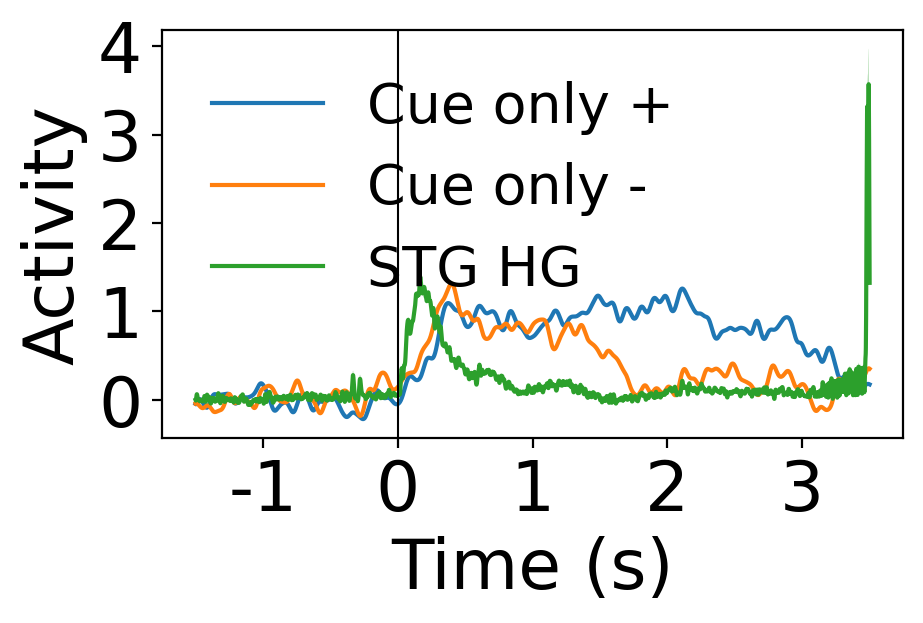

In [13]:
xvals = np.linspace(-1.5, 3.5, 5000)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(4.5, 3), dpi=200)
axs.patch.set_alpha(0)

adjestment = zscore(np.array(cue_speech_mat_pos_1), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_speech_mat_pos_1), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_speech_mat_pos_1), axis=1))
axs.plot(xvals, mean, label='Cue only +')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_speech_mat_neg_1), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_speech_mat_neg_1), axis=1).mean(axis=0)*-1+adjestment
sem = nansem(zscore(np.array(cue_speech_mat_neg_1), axis=1))
axs.plot(xvals, mean, label='Cue only -')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)


mean = ecog_hg_onset_mean.mean(axis=0)
sem = ecog_hg_onset_sem.mean(axis=0)
axs.plot(xvals, mean, label='STG HG')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

axs.axvline(0, color='k', linewidth=0.75)

axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=25)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=25)
axs.set_xlabel('Time (s)', fontsize=25)
axs.set_ylabel('Activity', fontsize=25)
axs.legend(frameon=0, fontsize=20)
plt.show();

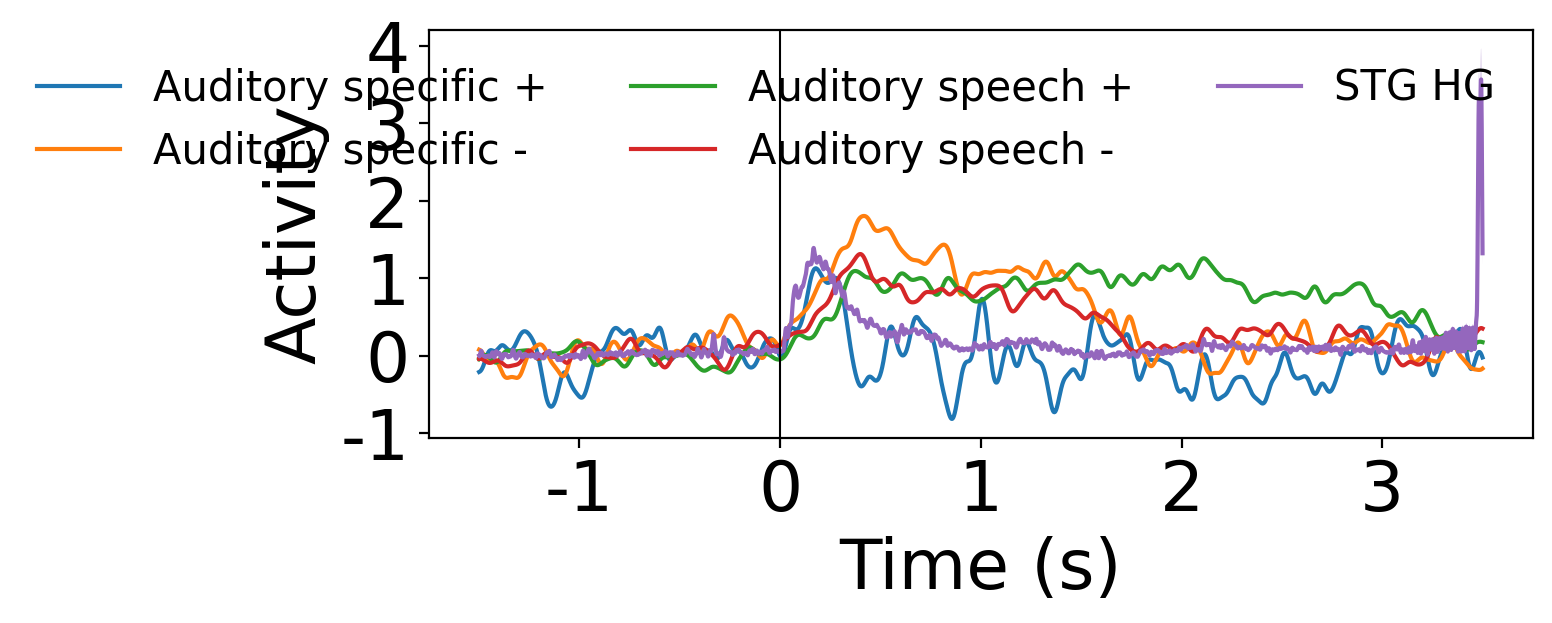

In [14]:
xvals = np.linspace(-1.5, 3.5, 5000)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(7.5, 3), dpi=200)
axs.patch.set_alpha(0)

adjestment = zscore(np.array(cue_only_pos), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_pos), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_only_pos), axis=1))
axs.plot(xvals, mean, label='Auditory specific +')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_only_neg), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_neg), axis=1).mean(axis=0)*-1+adjestment
sem = nansem(zscore(np.array(cue_only_neg), axis=1))
axs.plot(xvals, mean, label='Auditory specific -')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_speech_mat_pos_1), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_speech_mat_pos_1), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_speech_mat_pos_1), axis=1))
axs.plot(xvals, mean, label='Auditory speech +')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_speech_mat_neg_1), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_speech_mat_neg_1), axis=1).mean(axis=0)*-1+adjestment
sem = nansem(zscore(np.array(cue_speech_mat_neg_1), axis=1))
axs.plot(xvals, mean, label='Auditory speech -')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)


mean = ecog_hg_onset_mean.mean(axis=0)
sem = ecog_hg_onset_sem.mean(axis=0)
axs.plot(xvals, mean, label='STG HG')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

axs.axvline(0, color='k', linewidth=0.75)

axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=25)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=25)
axs.set_xlabel('Time (s)', fontsize=25)
axs.set_ylabel('Activity', fontsize=25)
axs.legend(frameon=0, fontsize=15, ncol=3, loc=1)
plt.show();

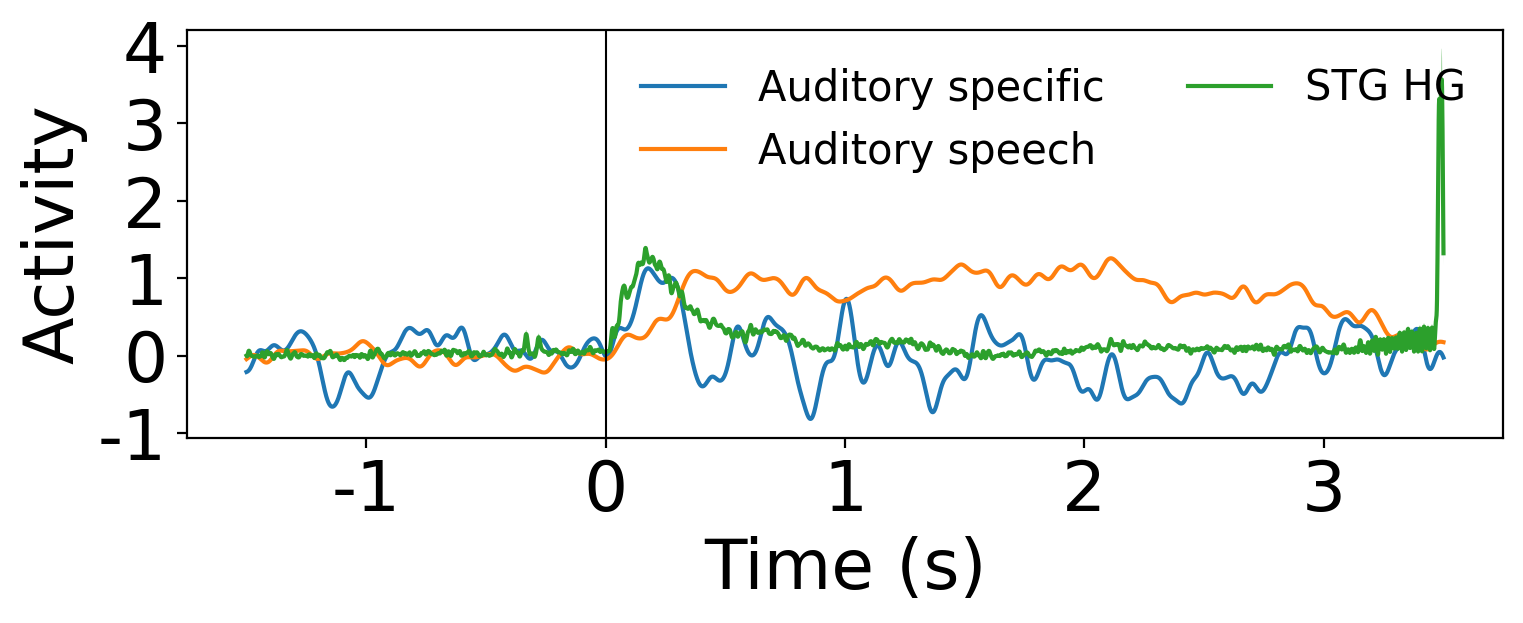

In [15]:
xvals = np.linspace(-1.5, 3.5, 5000)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(7.5, 3), dpi=200)
axs.patch.set_alpha(0)

adjestment = zscore(np.array(cue_only_pos), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_pos), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_only_pos), axis=1))
axs.plot(xvals, mean, label='Auditory specific')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_speech_mat_pos_1), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_speech_mat_pos_1), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_speech_mat_pos_1), axis=1))
axs.plot(xvals, mean, label='Auditory speech')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)


mean = ecog_hg_onset_mean.mean(axis=0)
sem = ecog_hg_onset_sem.mean(axis=0)
axs.plot(xvals, mean, label='STG HG')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

axs.axvline(0, color='k', linewidth=0.75)

axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=25)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=25)
axs.set_xlabel('Time (s)', fontsize=25)
axs.set_ylabel('Activity', fontsize=25)
axs.legend(frameon=0, fontsize=15, ncol=2, loc=1)
plt.show();

In [16]:
gpi_cue_mat = loadmat("processed_data/gpi_cue_mat.mat")
gpi_cue_1 = gpi_cue_mat['gpi_cue_1']

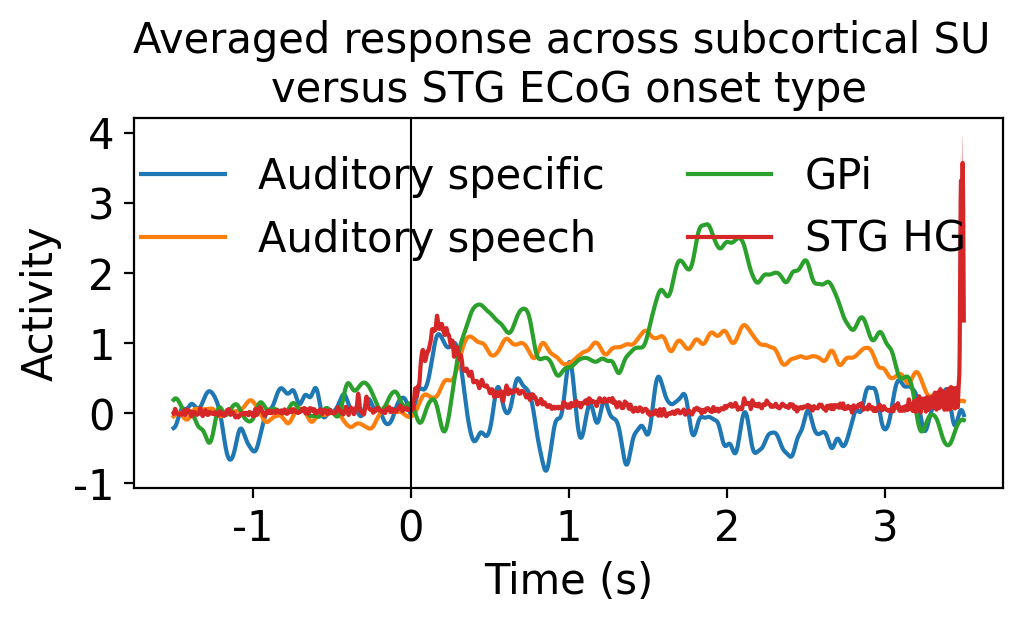

In [17]:
xvals = np.linspace(-1.5, 3.5, 5000)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(5, 3), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

adjestment = zscore(np.array(cue_only_pos), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_pos), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_only_pos), axis=1))
axs.plot(xvals, mean, label='Auditory specific')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(cue_speech_mat_pos_1), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_speech_mat_pos_1), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_speech_mat_pos_1), axis=1))
axs.plot(xvals, mean, label='Auditory speech')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

adjestment = zscore(np.array(gpi_cue_1), axis=1)[:, :1000].mean()
mean = zscore(np.array(gpi_cue_1), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(gpi_cue_1), axis=1))
axs.plot(xvals, mean, label='GPi')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

mean = ecog_hg_onset_mean.mean(axis=0)
sem = ecog_hg_onset_sem.mean(axis=0)
axs.plot(xvals, mean, label='STG HG')
axs.fill_between(xvals, mean-sem, mean+sem, alpha=0.5)

axs.axvline(0, color='k', linewidth=0.75)

axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=15)
axs.set_yticklabels(axs.get_yticks().astype(int), fontsize=15)
axs.set_xlabel('Time (s)', fontsize=15)
axs.set_ylabel('Activity', fontsize=15)
axs.legend(frameon=0, fontsize=15, ncol=2, loc=1)
axs.set_title('Averaged response across subcortical SU \nversus STG ECoG onset type', fontsize=15)
plt.show();

In [18]:

# function to convert to superscript 
def get_super(x): 
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s)) 
    return x.translate(res) 

In [19]:
cue_only_pos_test.shape
ecog_hg_onset_mean.shape
xvals.shape
zscore(np.array(cue_only_pos), axis=1)[:, :4900].shape

NameError: name 'cue_only_pos_test' is not defined

In [20]:
import statsmodels.stats.multitest as multitest


In [42]:
len(xvals)

4900

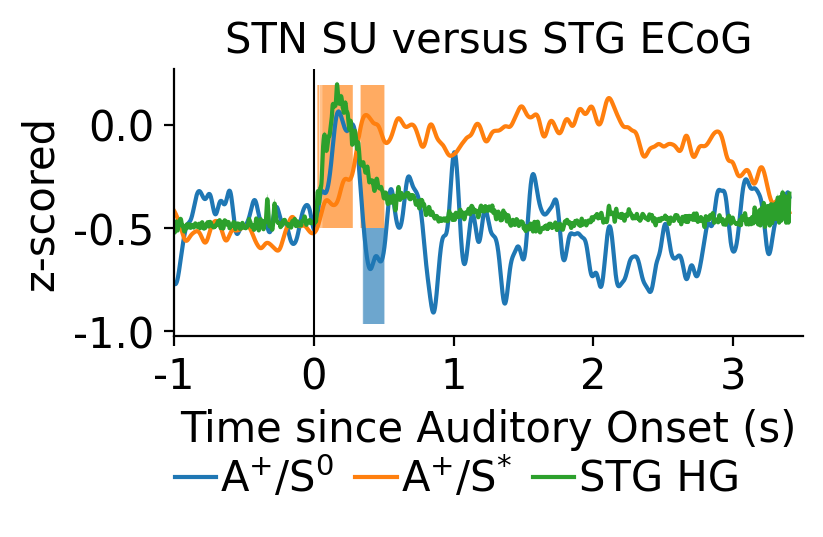

In [37]:
xvals = np.linspace(-1.5, 3.4, 4900)

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(4, 2.5), dpi=200)
axs.patch.set_alpha(0)
fig.patch.set_alpha(0)

adjestment = zscore(np.array(cue_only_pos), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_only_pos), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_only_pos), axis=1))
cue_only_pos_test = zscore(np.array(cue_only_pos), axis=1)[:, :4900] - adjestment
axs.plot(xvals, mean[:4900], label="A$^{+}$/S$^{0}$")
axs.fill_between(xvals, mean[:4900]-sem[:4900], mean[:4900]+sem[:4900], alpha=0.5)
significance = pd.DataFrame({"xvals":xvals, 
                             "pval":f_oneway(cue_only_pos_test, ecog_hg_onset_mean[:, :4900]).pvalue})
patch_y = 0 - axs.get_ylim()[0]
for item in range(1500, 2000):
    if multitest.fdrcorrection(significance.pval)[0][item] == True:
        axs.add_patch(mpatches.Rectangle((item/1000-1.5, 
                                                   axs.get_ylim()[0]), 
                                                  0.01, patch_y, color='#1f77b4', 
                                                  alpha=0.1, ec=None))

adjestment = zscore(np.array(cue_speech_mat_pos_1), axis=1)[:, :1000].mean()
mean = zscore(np.array(cue_speech_mat_pos_1), axis=1).mean(axis=0)-adjestment
sem = nansem(zscore(np.array(cue_speech_mat_pos_1), axis=1))
cue_speech_mat_pos_1_test = zscore(np.array(cue_speech_mat_pos_1), axis=1)[:, :4900] - adjestment
axs.plot(xvals, mean[:4900], label="A$^{+}$/S$^{*}$")
axs.fill_between(xvals, mean[:4900]-sem[:4900], mean[:4900]+sem[:4900], alpha=0.5)
significance = pd.DataFrame({"xvals":xvals, 
                             "pval":f_oneway(cue_speech_mat_pos_1_test, ecog_hg_onset_mean[:, :4900]).pvalue})
patch_y = axs.get_ylim()[1] - 0
for item in range(1500, 2000):
    if multitest.fdrcorrection(significance.pval)[0][item] == True:
        axs.add_patch(mpatches.Rectangle((item/1000-1.5, 
                                                   0), 
                                                  0.01, patch_y, color='#ff7f0e', 
                                                  alpha=0.1, ec=None))

mean = ecog_hg_onset_mean.mean(axis=0)
sem = ecog_hg_onset_sem.mean(axis=0)
axs.plot(xvals, mean[:4900], label='STG HG')
axs.fill_between(xvals, mean[:4900]-sem[:4900], mean[:4900]+sem[:4900], alpha=0.5)

axs.axvline(0, color='k', linewidth=0.75)
axs.set_xlim(-1, 3.5)

axs.set_xticklabels(axs.get_xticks().astype(int), fontsize=15)
axs.set_yticklabels([round(item, 2) for item in axs.get_yticks()], fontsize=15)
axs.set_xlabel('Time since Auditory Onset (s)', fontsize=15)
axs.set_ylabel('z-scored', fontsize=15)
handles, labels = axs.get_legend_handles_labels()

plt.legend(handles, labels, frameon=0, fontsize=15, ncol=3, 
           loc='upper center', bbox_to_anchor=(0.45, -0.3), handlelength=1, 
           handletextpad=0.1, columnspacing=0.5)
axs.set_title('STN SU versus STG ECoG', fontsize=15)
#plt.savefig("../plots/fig3e.svg", format = 'svg', dpi=200);
sns.despine(ax=axs, top=True, right=True, left=False, bottom=False)

plt.show();

In [28]:
handles, labels = axs.get_legend_handles_labels()
handles
labels

['A$^{+}$/S$^{0}$', 'A$^{+}$/S$^{*}$', 'STG HG']

In [25]:
adjestment = zscore(np.array(cue_only_pos), axis=1)[:, :1000].mean()
cue_only_pos_test = zscore(np.array(cue_only_pos), axis=1) - adjestment

adjestment = zscore(np.array(cue_speech_mat_pos_1), axis=1)[:, :1000].mean()
cue_speech_mat_pos_1_test = zscore(np.array(cue_speech_mat_pos_1), axis=1) - adjestment

In [15]:
zscore(np.array(cue_only_pos), axis=1).shape
zscore(np.array(cue_speech_mat_pos_1), axis=1).shape
ecog_hg_onset_mean.shape

(9, 5000)

(35, 5000)

(62, 5000)

In [21]:
adjestment

-0.5494026177218199

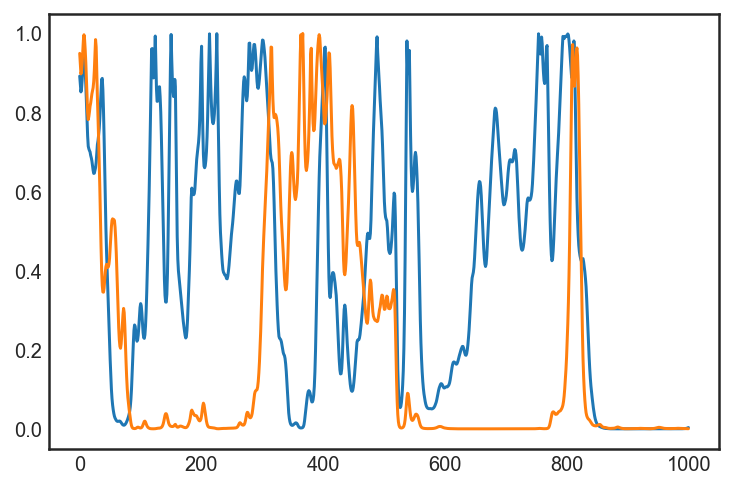

In [27]:
plt.plot(f_oneway(cue_only_pos_test, ecog_hg_onset_mean).pvalue[1000:2000])
plt.plot(f_oneway(cue_speech_mat_pos_1_test, ecog_hg_onset_mean).pvalue[1000:2000])